<a href="https://colab.research.google.com/github/ganesbandhu/SMS-spam-classifier-/blob/main/SMS_spam_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/archive (1).zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
dataset=pd.read_csv('spam.csv', encoding='latin-1')

In [ ]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
dataset.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
dataset.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [ ]:
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
dataset['v1'] = dataset['v1'].map({'ham':0, 'spam':1})

In [ ]:
dataset.isna().sum()

v1    0
v2    0
dtype: int64

In [ ]:
dataset.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<Axes: ylabel='count'>

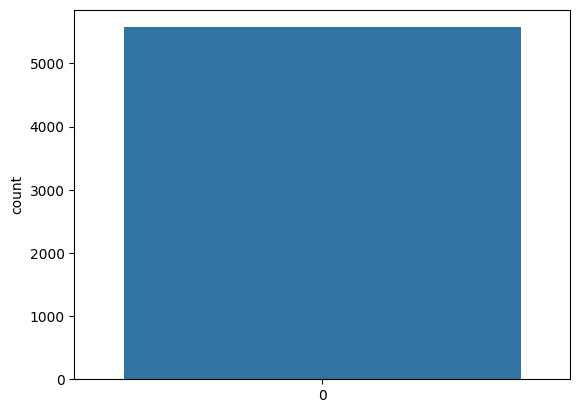

In [ ]:
sns.countplot(dataset['v1'])

In [ ]:
import re
import nltk

In [ ]:
import nltk.corpus
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [ ]:
corpus = []

In [ ]:
dataset['v2'][1]

'Ok lar... Joking wif u oni...'

In [ ]:
for i in range(0, len(dataset)):
  message = re.sub('[a-zA-Z]','',dataset['v2'][i])
  message = message.lower()
  message = message.split()
  ss = SnowballStemmer(language='english')
  message = ''.join(message)
  corpus.append(message)

In [ ]:
corpus = [2]

In [ ]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
corpus = [str(i) for i in corpus if i]
corpus = [str(i) for i in corpus]
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 0].values

ValueError: empty vocabulary; perhaps the documents only contain stop words